In [1]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
datasets['cmc']['data'][:3,:]

array([[24.,  2.,  3.,  3.,  1.,  1.,  2.,  3.,  0.],
       [45.,  1.,  3., 10.,  1.,  1.,  3.,  4.,  0.],
       [43.,  2.,  3.,  7.,  1.,  1.,  3.,  4.,  0.]])

In [4]:
config = ex.config_calculation_strategy2(datasets)

In [5]:
config['cleveland'] = {
'nn_config': {
    'units_1st_layer': 13,
    'units_2nd_layer': 64,
    'units_3rd_layer': 32,
    'units_latent_layer': 6
},
"weighted_triplet_loss": True,
"lr": 1e-4,
"batch_size": 16,
"gamma": 0.95,
"epochs": 100
}

config['2delikatne-cut'] = {
'nn_config': {
    'units_1st_layer': 2,
    'units_2nd_layer': 8,
    'units_3rd_layer': 4,
    'units_latent_layer': 2
},
'weighted_triplet_loss': True,
'lr': 1e-4,
'batch_size': 16,
'gamma': 0.95,
'epochs': 100
}

config['3mocniej-cut'] = {
'nn_config': {
    'units_1st_layer': 2,
    'units_2nd_layer': 8,
    'units_3rd_layer': 4,
    'units_latent_layer': 2
},
'weighted_triplet_loss': True,
'lr': 1e-4,
'batch_size': 16,
'gamma': 0.95,
'epochs': 100
}

config['cmc'] = {'nn_config': {'units_1st_layer': 9,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 1e-4,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100
}

config['dermatology'] = {'nn_config': {'units_1st_layer': 34,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 1e-4,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100}

In [6]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 8,
   'units_3rd_layer': 4,
   'units_latent_layer': 2},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 8,
   'units_3rd_layer': 4,
   'units_latent_layer': 2},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 'balance-scale': {'nn_config': {'units

In [7]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced')
        } 
    return classifiers

1czysty-cut


100%|██████████| 240/240 [00:00<00:00, 3266.73it/s]


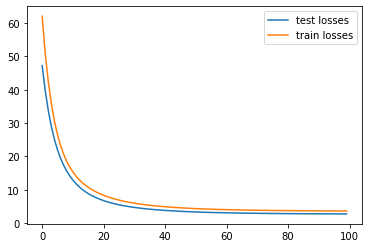

100%|██████████| 240/240 [00:00<00:00, 3027.01it/s]


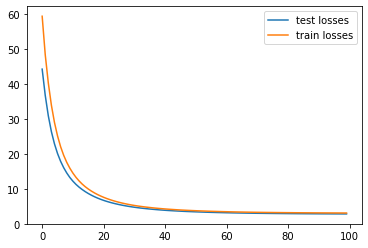

100%|██████████| 240/240 [00:00<00:00, 3109.12it/s]


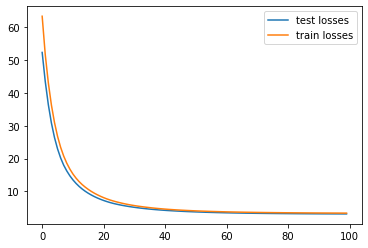

100%|██████████| 240/240 [00:00<00:00, 3567.89it/s]


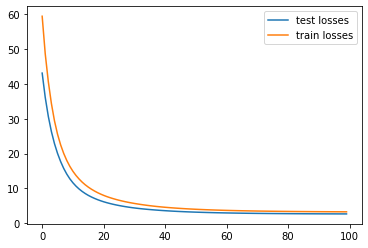

100%|██████████| 240/240 [00:00<00:00, 3595.64it/s]


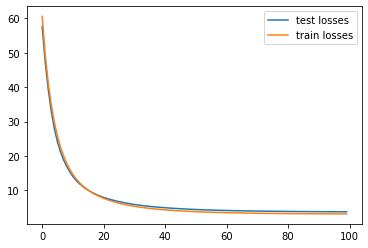

2delikatne-cut


100%|██████████| 240/240 [00:00<00:00, 3530.81it/s]


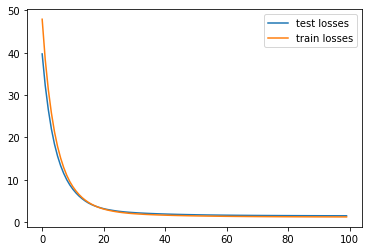

100%|██████████| 240/240 [00:00<00:00, 3570.16it/s]


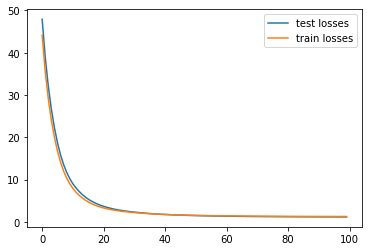

100%|██████████| 240/240 [00:00<00:00, 3554.38it/s]


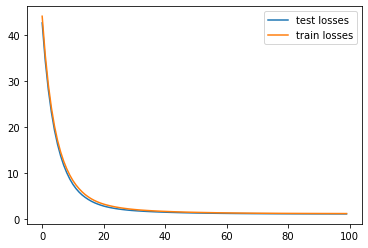

100%|██████████| 240/240 [00:00<00:00, 2779.33it/s]


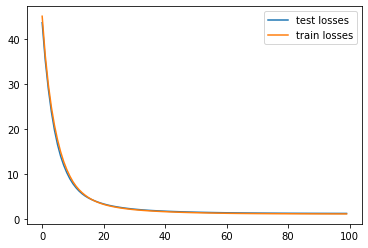

100%|██████████| 240/240 [00:00<00:00, 3335.42it/s]


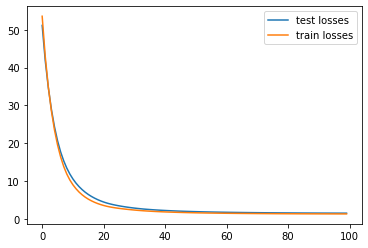

3mocniej-cut


100%|██████████| 240/240 [00:00<00:00, 3651.24it/s]


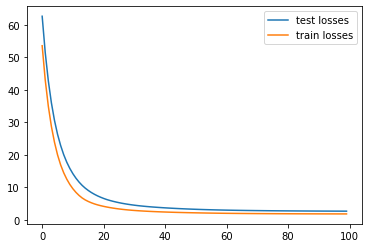

100%|██████████| 240/240 [00:00<00:00, 3632.66it/s]


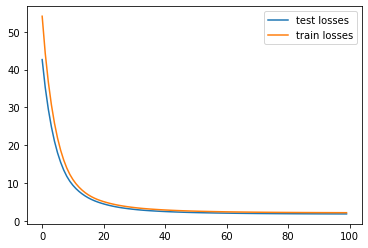

100%|██████████| 240/240 [00:00<00:00, 3694.32it/s]


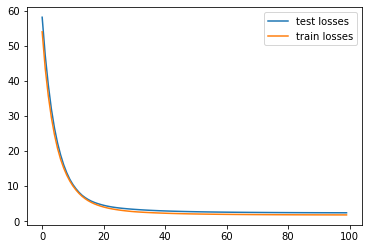

100%|██████████| 240/240 [00:00<00:00, 3488.11it/s]


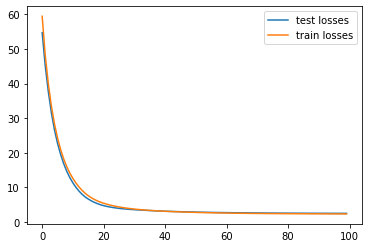

100%|██████████| 240/240 [00:00<00:00, 3658.10it/s]


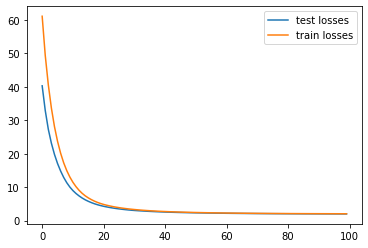

4delikatne-bezover-cut


100%|██████████| 240/240 [00:00<00:00, 3707.36it/s]


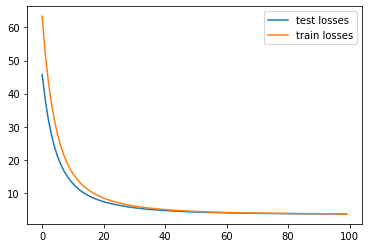

100%|██████████| 240/240 [00:00<00:00, 3520.48it/s]


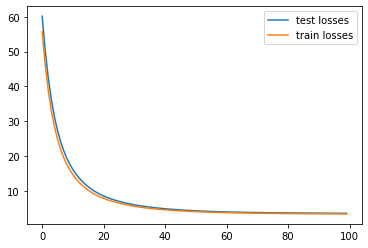

100%|██████████| 240/240 [00:00<00:00, 3597.35it/s]


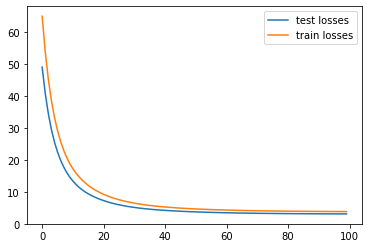

100%|██████████| 240/240 [00:00<00:00, 3615.32it/s]


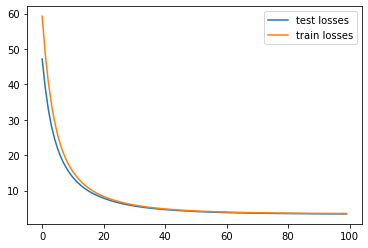

100%|██████████| 240/240 [00:00<00:00, 3601.12it/s]


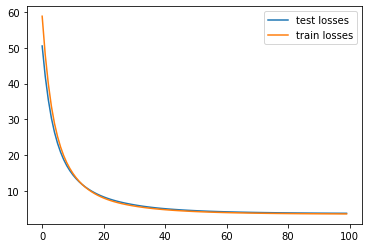

balance-scale


100%|██████████| 125/125 [00:00<00:00, 3002.66it/s]


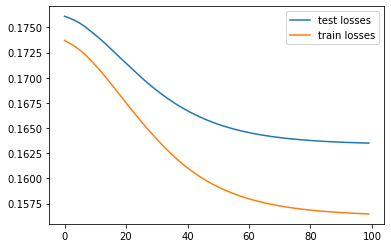

100%|██████████| 125/125 [00:00<00:00, 3494.65it/s]


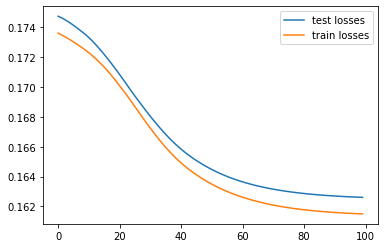

100%|██████████| 125/125 [00:00<00:00, 3001.57it/s]


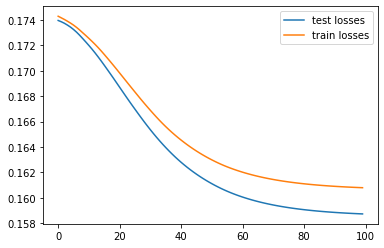

100%|██████████| 125/125 [00:00<00:00, 3557.53it/s]


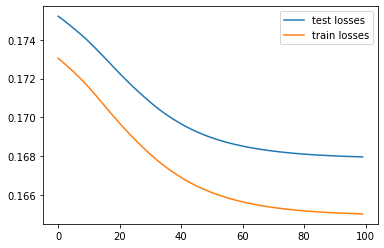

100%|██████████| 125/125 [00:00<00:00, 3589.54it/s]


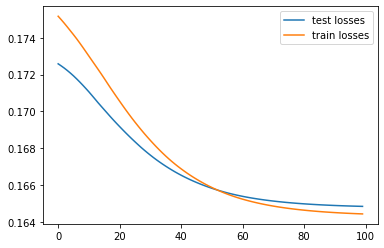

cleveland


100%|██████████| 61/61 [00:00<00:00, 3416.01it/s]


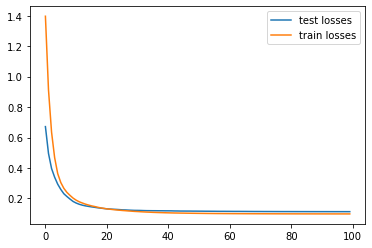

100%|██████████| 61/61 [00:00<00:00, 3473.05it/s]


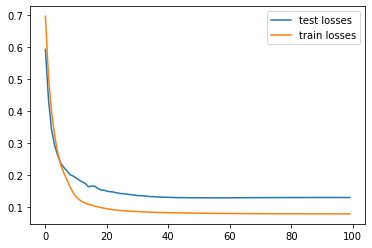

100%|██████████| 61/61 [00:00<00:00, 3288.17it/s]


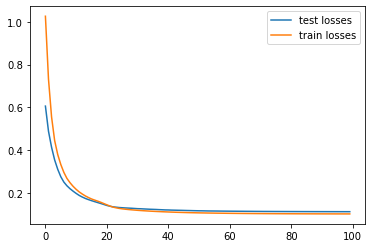

100%|██████████| 60/60 [00:00<00:00, 3111.19it/s]


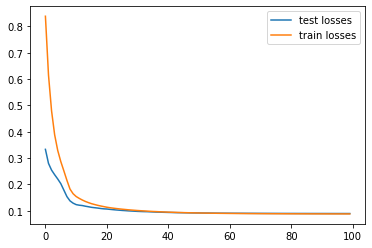

100%|██████████| 60/60 [00:00<00:00, 3525.02it/s]


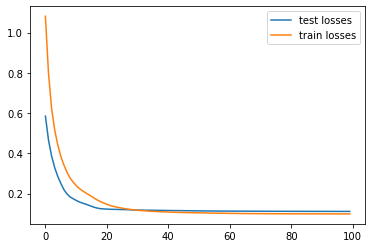

cleveland_v2


100%|██████████| 61/61 [00:00<00:00, 3422.36it/s]


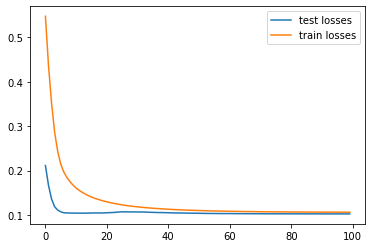

100%|██████████| 61/61 [00:00<00:00, 3597.93it/s]


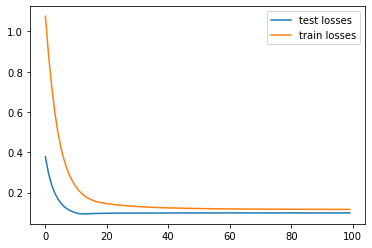

100%|██████████| 61/61 [00:00<00:00, 2859.55it/s]


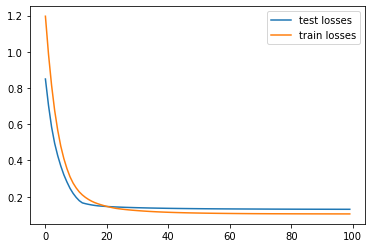

100%|██████████| 60/60 [00:00<00:00, 3234.97it/s]


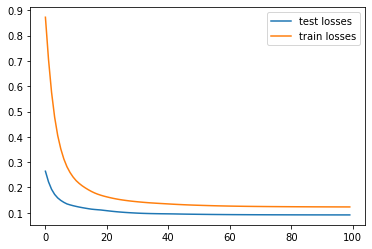

100%|██████████| 60/60 [00:00<00:00, 3484.36it/s]


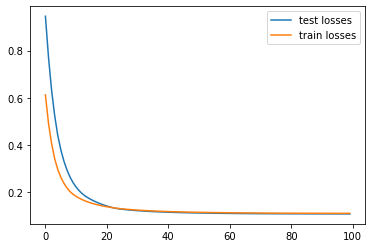

cmc


100%|██████████| 295/295 [00:00<00:00, 3437.11it/s]


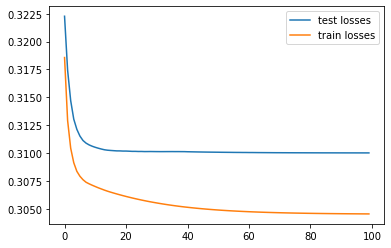

100%|██████████| 295/295 [00:00<00:00, 3355.32it/s]


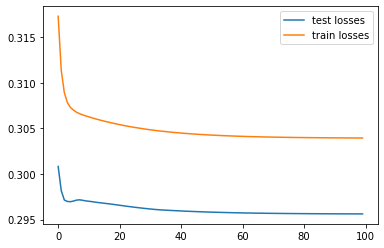

100%|██████████| 295/295 [00:00<00:00, 3473.19it/s]


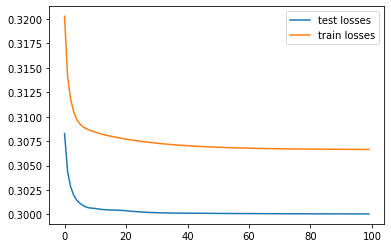

100%|██████████| 294/294 [00:00<00:00, 3291.15it/s]


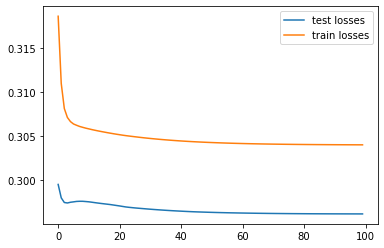

100%|██████████| 294/294 [00:00<00:00, 3458.85it/s]


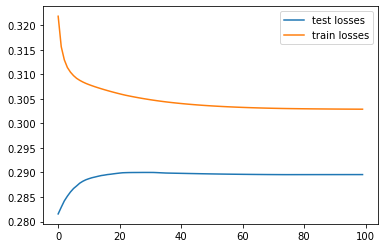

dermatology


100%|██████████| 74/74 [00:00<00:00, 3438.68it/s]


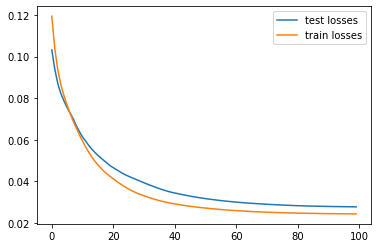

100%|██████████| 73/73 [00:00<00:00, 3536.96it/s]


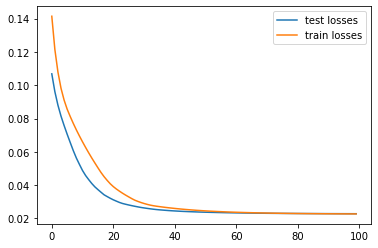

100%|██████████| 73/73 [00:00<00:00, 3603.31it/s]


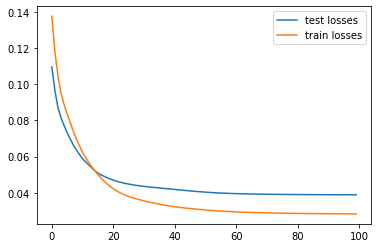

100%|██████████| 73/73 [00:00<00:00, 3618.90it/s]


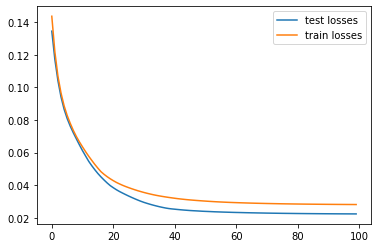

100%|██████████| 73/73 [00:00<00:00, 3623.40it/s]


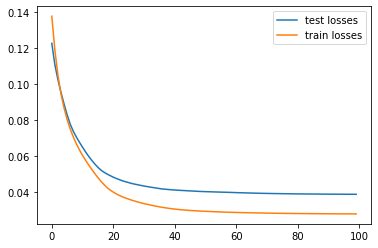

glass


100%|██████████| 43/43 [00:00<00:00, 3468.70it/s]


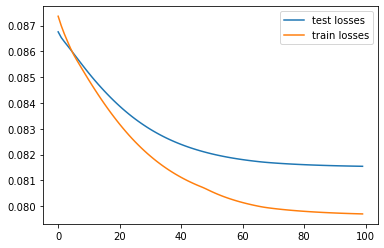

100%|██████████| 43/43 [00:00<00:00, 3496.61it/s]


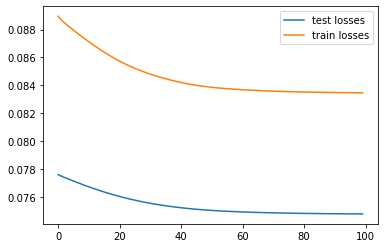

100%|██████████| 43/43 [00:00<00:00, 3557.44it/s]


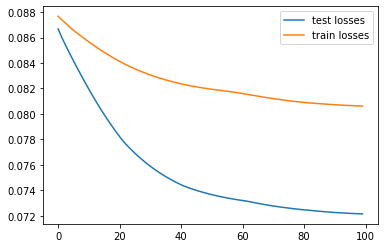

100%|██████████| 43/43 [00:00<00:00, 3381.11it/s]


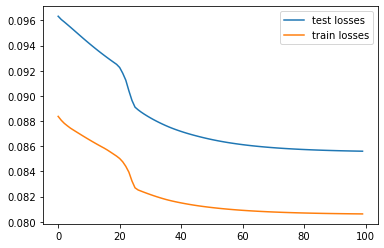

100%|██████████| 42/42 [00:00<00:00, 3483.78it/s]


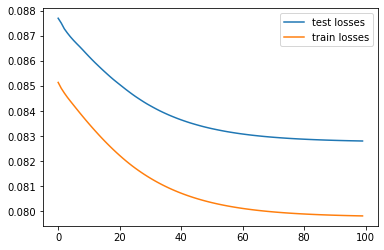

hayes-roth


100%|██████████| 32/32 [00:00<00:00, 3198.40it/s]


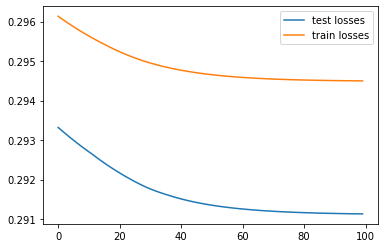

100%|██████████| 32/32 [00:00<00:00, 3408.53it/s]


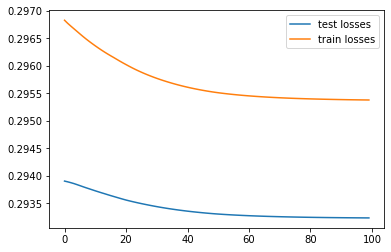

100%|██████████| 32/32 [00:00<00:00, 3243.62it/s]


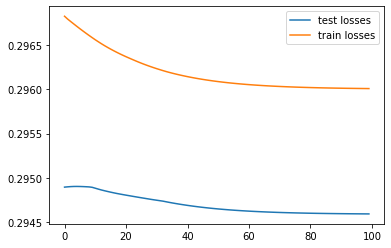

100%|██████████| 32/32 [00:00<00:00, 3451.21it/s]


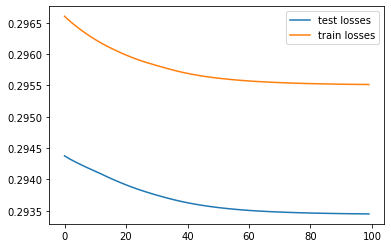

100%|██████████| 32/32 [00:00<00:00, 2391.32it/s]


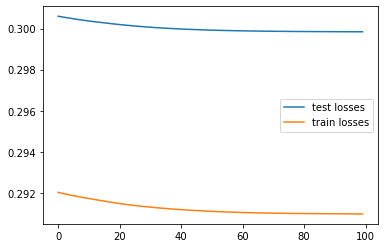

new_ecoli


100%|██████████| 68/68 [00:00<00:00, 2717.29it/s]


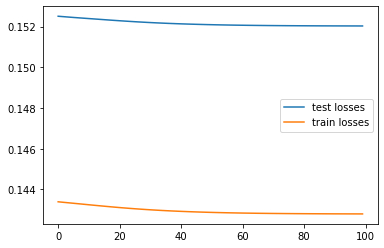

100%|██████████| 67/67 [00:00<00:00, 3533.40it/s]


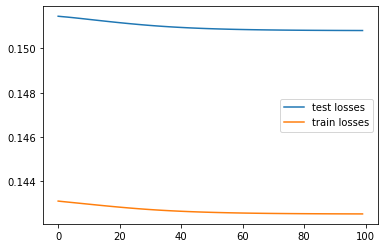

100%|██████████| 67/67 [00:00<00:00, 2965.83it/s]


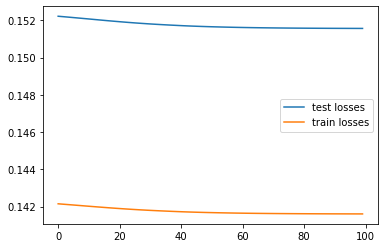

100%|██████████| 67/67 [00:00<00:00, 3386.05it/s]


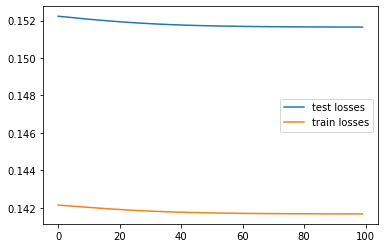

100%|██████████| 67/67 [00:00<00:00, 3499.17it/s]


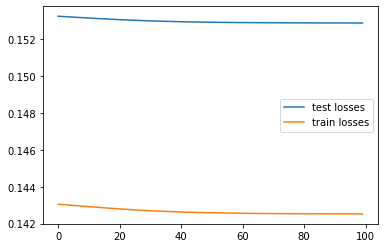

new_led7digit


100%|██████████| 100/100 [00:00<00:00, 3543.80it/s]


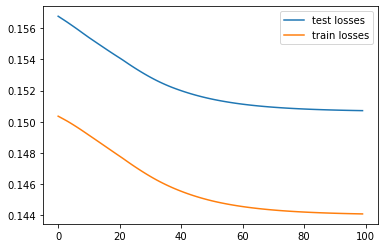

100%|██████████| 100/100 [00:00<00:00, 3341.70it/s]


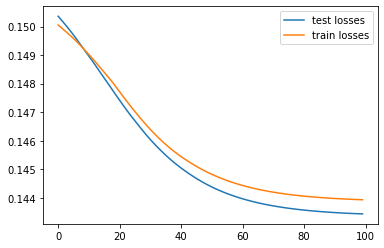

100%|██████████| 100/100 [00:00<00:00, 3248.30it/s]


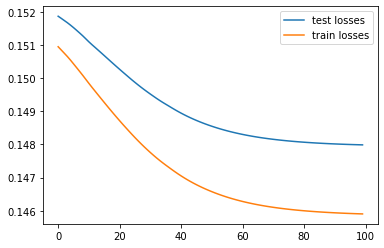

100%|██████████| 100/100 [00:00<00:00, 2932.65it/s]


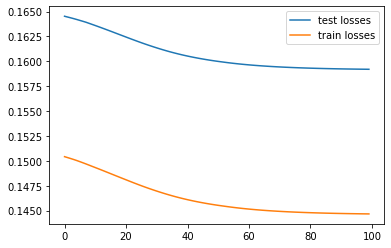

100%|██████████| 100/100 [00:00<00:00, 3101.49it/s]


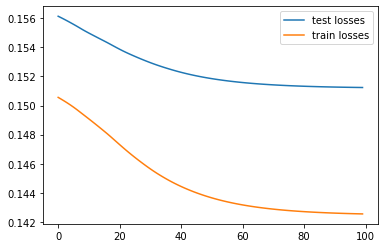

new_vehicle


100%|██████████| 170/170 [00:00<00:00, 2861.20it/s]


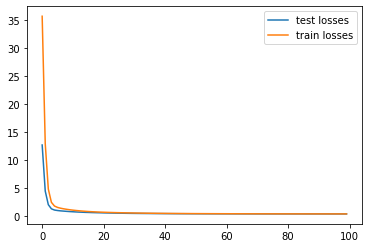

100%|██████████| 169/169 [00:00<00:00, 3235.33it/s]


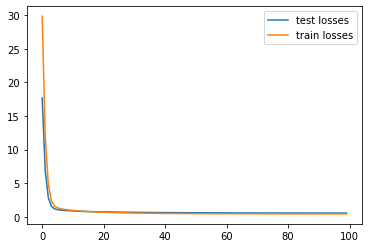

100%|██████████| 169/169 [00:00<00:00, 3199.62it/s]


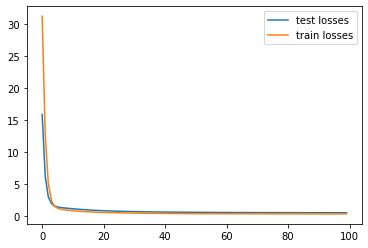

100%|██████████| 169/169 [00:00<00:00, 3295.22it/s]


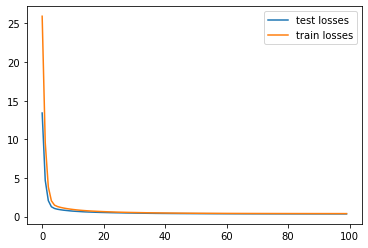

100%|██████████| 169/169 [00:00<00:00, 3249.67it/s]


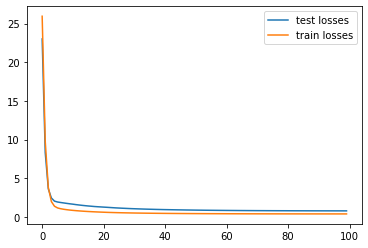

new_winequality-red


100%|██████████| 320/320 [00:00<00:00, 3488.55it/s]


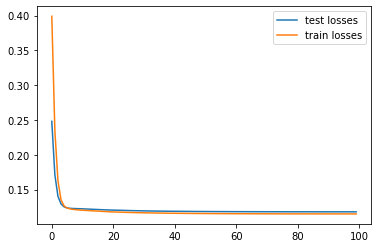

100%|██████████| 320/320 [00:00<00:00, 3400.00it/s]


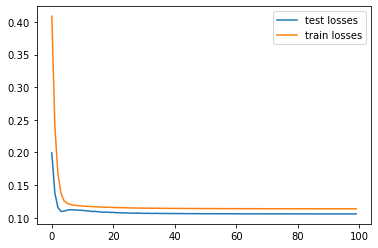

100%|██████████| 320/320 [00:00<00:00, 3374.83it/s]


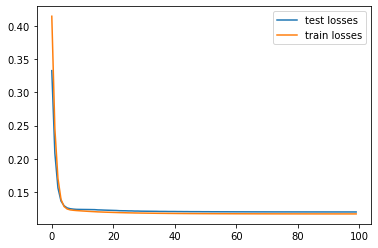

100%|██████████| 320/320 [00:00<00:00, 3464.60it/s]


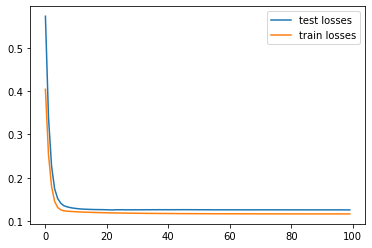

100%|██████████| 319/319 [00:00<00:00, 3383.50it/s]


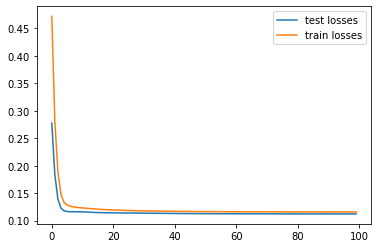

new_yeast


100%|██████████| 297/297 [00:00<00:00, 3223.59it/s]


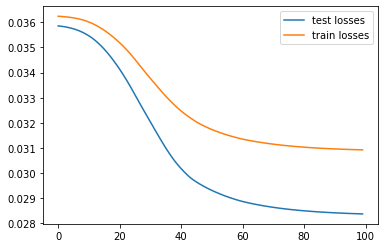

100%|██████████| 297/297 [00:00<00:00, 3349.37it/s]


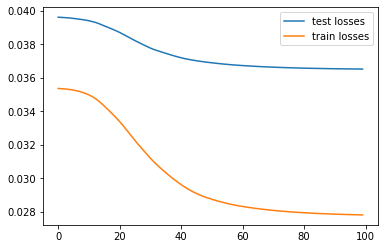

100%|██████████| 297/297 [00:00<00:00, 3524.81it/s]


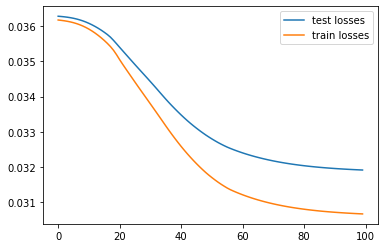

100%|██████████| 297/297 [00:00<00:00, 3424.33it/s]


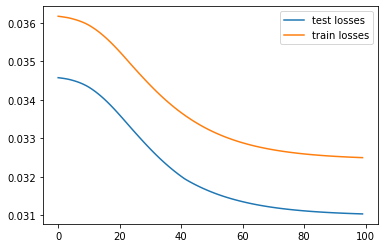

100%|██████████| 296/296 [00:00<00:00, 3006.28it/s]


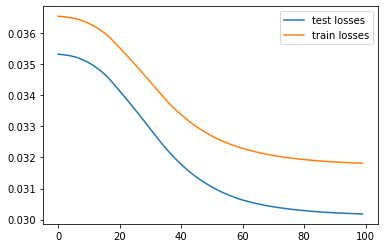

thyroid-newthyroid


100%|██████████| 43/43 [00:00<00:00, 3279.90it/s]


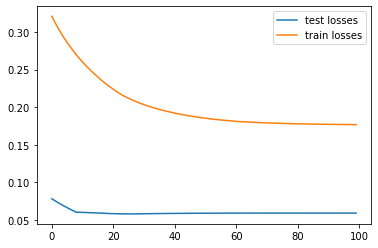

100%|██████████| 43/43 [00:00<00:00, 3313.04it/s]


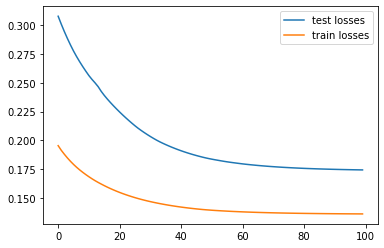

100%|██████████| 43/43 [00:00<00:00, 3018.09it/s]


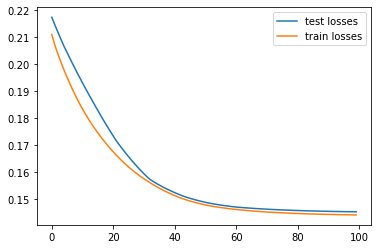

100%|██████████| 43/43 [00:00<00:00, 3126.50it/s]


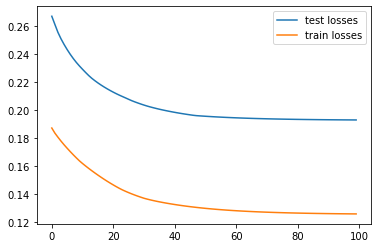

100%|██████████| 43/43 [00:00<00:00, 3334.23it/s]


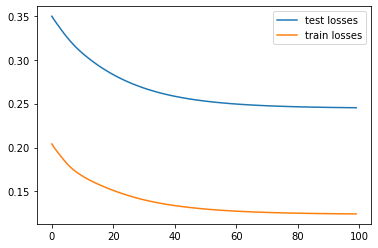

In [8]:
result_dict = defaultdict(list)

# for dataset_name in ['glass']:
for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    fold_result_dict = defaultdict(list)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train, y_train, X_test, y_test, weights,cfg)
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
            
            #f1, gmean
    # mean over folds
    # wiersze: datasety, 
    # kolumny -> klasyfikatory (przed dodaniem cech, po dodaniu, na samych nowych cechach)

In [9]:
results_df = pd.DataFrame.from_dict(result_dict)

In [10]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features
0,1czysty-cut,0.934189,0.938694,0.935490,0.936512,0.954297,0.952566,0.951944,0.952356,0.956466,0.963368,0.928410,0.930954
1,2delikatne-cut,0.761136,0.756883,0.724198,0.737376,0.756064,0.742660,0.728784,0.738986,0.526007,0.461828,0.512273,0.485009
2,3mocniej-cut,0.560931,0.519703,0.504810,0.502048,0.575520,0.526919,0.506479,0.493555,0.466604,0.339552,0.413274,0.383421
3,4delikatne-bezover-cut,0.820201,0.835313,0.796105,0.813035,0.813789,0.828012,0.815588,0.833586,0.799418,0.811039,0.802404,0.822233
4,balance-scale,0.594609,0.092416,0.605016,0.416495,0.701052,0.447044,0.678115,0.526386,0.625792,0.358803,0.645663,0.521175
5,cleveland,0.330465,0.102857,0.298673,0.125694,0.300348,0.074481,0.280646,0.134668,0.266385,0.068175,0.228728,0.078671
6,cleveland_v2,0.357721,0.070277,0.341720,0.166359,0.328651,0.097791,0.355371,0.160648,0.332863,0.063802,0.308261,0.202445
7,cmc,0.516400,0.514937,0.467943,0.470938,0.511838,0.502429,0.474086,0.474655,0.480618,0.473565,0.400382,0.399010
8,dermatology,0.964200,0.962295,0.949703,0.951222,0.960898,0.956230,0.934017,0.936024,0.885390,0.869730,0.836753,0.815112
9,glass,0.757974,0.580721,0.643407,0.527451,0.666032,0.477691,0.537216,0.200975,0.546867,0.194885,0.531043,0.411280


In [11]:
results_df.filter(regex=("dataset|RF24-f1*"))

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,1czysty-cut,0.934189,0.954297,0.956466
1,2delikatne-cut,0.761136,0.756064,0.526007
2,3mocniej-cut,0.560931,0.575520,0.466604
3,4delikatne-bezover-cut,0.820201,0.813789,0.799418
4,balance-scale,0.594609,0.701052,0.625792
5,cleveland,0.330465,0.300348,0.266385
6,cleveland_v2,0.357721,0.328651,0.332863
7,cmc,0.516400,0.511838,0.480618
8,dermatology,0.964200,0.960898,0.885390
9,glass,0.757974,0.666032,0.546867


In [12]:
results_df.filter(regex=("dataset|RF24-gmean*"))

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,1czysty-cut,0.938694,0.952566,0.963368
1,2delikatne-cut,0.756883,0.742660,0.461828
2,3mocniej-cut,0.519703,0.526919,0.339552
3,4delikatne-bezover-cut,0.835313,0.828012,0.811039
4,balance-scale,0.092416,0.447044,0.358803
5,cleveland,0.102857,0.074481,0.068175
6,cleveland_v2,0.070277,0.097791,0.063802
7,cmc,0.514937,0.502429,0.473565
8,dermatology,0.962295,0.956230,0.869730
9,glass,0.580721,0.477691,0.194885


In [13]:
results_df.filter(regex=("dataset|DT-f1*"))

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,1czysty-cut,0.935490,0.951944,0.928410
1,2delikatne-cut,0.724198,0.728784,0.512273
2,3mocniej-cut,0.504810,0.506479,0.413274
3,4delikatne-bezover-cut,0.796105,0.815588,0.802404
4,balance-scale,0.605016,0.678115,0.645663
5,cleveland,0.298673,0.280646,0.228728
6,cleveland_v2,0.341720,0.355371,0.308261
7,cmc,0.467943,0.474086,0.400382
8,dermatology,0.949703,0.934017,0.836753
9,glass,0.643407,0.537216,0.531043


In [14]:
results_df.filter(regex=("dataset|DT-gmean*"))

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,1czysty-cut,0.936512,0.952356,0.930954
1,2delikatne-cut,0.737376,0.738986,0.485009
2,3mocniej-cut,0.502048,0.493555,0.383421
3,4delikatne-bezover-cut,0.813035,0.833586,0.822233
4,balance-scale,0.416495,0.526386,0.521175
5,cleveland,0.125694,0.134668,0.078671
6,cleveland_v2,0.166359,0.160648,0.202445
7,cmc,0.470938,0.474655,0.399010
8,dermatology,0.951222,0.936024,0.815112
9,glass,0.527451,0.200975,0.411280
